In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from scipy import stats
import datetime, glob
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.options.display.max_columns = None

In [369]:
appended_data = []
for file in ['Jan18_.xlsx','Feb18_.xlsx', 'Mar18_.xlsx', 'Apr18_.xlsx', 'May18_.xlsx', 'Jun17_.xlsx','Jul17_.xlsx',
             'Aug17_.xlsx','Sep17_.xlsx', 'Oct17_.xlsx','Nov17_.xlsx', 'Dec17_.xlsx']:
    filename = file.split("_")[0]
    sheetname = file.split('.')[0]
    filename = pd.read_excel(file, sheetname, encoding = 'cp1252')
    appended_data.append(filename)
appended_data = pd.concat(appended_data, axis=0)


In [370]:
appended_data.head()

,ACTUAL_ELAPSED_TIME,AIR_TIME,ARR_DELAY,ARR_TIME,ARR_TIME_BLK,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,Condition,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,DEP_TIME,DEP_TIME_BLK,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DISTANCE,DISTANCE_GROUP,DIVERTED,Dew Point,FIRST_DEP_TIME,FLIGHTS,FL_DATE,FL_NUM,Humidity,LATE_AIRCRAFT_DELAY,LONGEST_ADD_GTIME,MONTH,NAS_DELAY,OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,Precip Accum,Precip.,Pressure,QUARTER,SECURITY_DELAY,TAIL_NUM,TAXI_IN,TAXI_OUT,TOTAL_ADD_GTIME,Temperature,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,WEATHER_DELAY,WHEELS_OFF,WHEELS_ON,Wind,Wind Gust,Wind Speed,YEAR
0,380.0,348.0,-45.0,1010.0,NaN,NaN,0,NaN,NaN,1055,700,415,Fair / Windy,1.0,1.0,-10.0,650.0,NaN,LAX,"Los Angeles, CA",CA,2475,10,0,-5 F,NaN,1,2018-01-01,NaN,58 %,NaN,NaN,1,NaN,33.0,AA,JFK,"New York, NY",NY,0.0 in,0.0 in,30.4 in,1,NaN,N108NN,9.0,23.0,NaN,7 F,NaN,NaN,NaN,NaN,NaN,713.0,1001.0,NW,0 mph,21 mph,2018
1,398.0,345.0,1.0,1146.0,NaN,NaN,0,NaN,NaN,1145,800,405,Fair,1.0,1.0,8.0,808.0,NaN,LAX,"Los Angeles, CA",CA,2475,10,0,-5 F,NaN,1,2018-01-01,NaN,55 %,NaN,NaN,1,NaN,1.0,AA,JFK,"New York, NY",NY,0.0 in,0.0 in,30.4 in,1,NaN,N114NN,27.0,26.0,NaN,8 F,NaN,NaN,NaN,NaN,NaN,834.0,1119.0,NW,0 mph,18 mph,2018
2,414.0,352.0,26.0,1459.0,NaN,NaN,0,NaN,0.0,1433,1100,393,Fair / Windy,1.0,1.0,5.0,1105.0,NaN,LAX,"Los Angeles, CA",CA,2475,10,0,-3 F,NaN,1,2018-01-01,NaN,49 %,0.0,NaN,1,21.0,163.0,AA,JFK,"New York, NY",NY,0.0 in,0.0 in,30.4 in,1,0.0,N109NN,5.0,57.0,NaN,13 F,NaN,NaN,NaN,NaN,5.0,1202.0,1454.0,NW,0 mph,24 mph,2018
3,385.0,347.0,119.0,1539.0,NaN,NaN,0,NaN,119.0,1340,1000,400,NaN,1.0,1.0,134.0,1214.0,NaN,LAX,"Los Angeles, CA",CA,2475,10,0,-3 F,NaN,1,2018-01-01,NaN,45 %,0.0,NaN,1,0.0,255.0,AA,JFK,"New York, NY",NY,0.0 in,0.0 in,30.4 in,1,0.0,N107NN,8.0,30.0,NaN,15 F,NaN,NaN,NaN,NaN,0.0,1244.0,1531.0,NW,0 mph,21 mph,2018
4,384.0,334.0,111.0,1719.0,NaN,NaN,0,NaN,111.0,1528,1200,388,Fair / Windy,1.0,1.0,115.0,1355.0,NaN,LAX,"Los Angeles, CA",CA,2475,10,0,-4 F,NaN,1,2018-01-01,NaN,39 %,0.0,NaN,1,0.0,3.0,AA,JFK,"New York, NY",NY,0.0 in,0.0 in,30.3 in,1,0.0,N117AN,27.0,23.0,NaN,17 F,NaN,NaN,NaN,NaN,0.0,1418.0,1652.0,NNW,0 mph,24 mph,2018


In [371]:
appended_data.MONTH.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [372]:
#may = pd.read_excel('May18__.xlsx' , 'Weather', encoding= 'cp1252')

In [373]:
#may.FL_DATE = pd.to_datetime(may.FL_DATE, format = '%Y-%m-%d')

In [374]:
#may.FL_DATE[:3]

In [375]:
#jan = pd.read_excel('Jan18_.xlsx' , 'Jan18_', encoding= 'cp1252')

In [376]:
#jan.FL_DATE = pd.to_datetime(jan.FL_DATE, format = '%Y-%m-%d')

In [377]:
#jan.FL_DATE[:3]

In [378]:
#mar = pd.read_csv('Mar18_.csv', encoding='cp1252')

In [379]:
#mar.FL_DATE = pd.to_datetime(mar.FL_DATE, format = '%d-%m-%Y')

In [380]:
#mar.FL_DATE[:3]

In [381]:
#apr = pd.read_csv('Apr18_.csv', encoding='cp1252')

In [382]:
#apr.FL_DATE = pd.to_datetime(apr.FL_DATE, format = '%d-%m-%Y')

In [383]:
#apr.FL_DATE[:3]

In [384]:
#feb = pd.read_csv('Feb18_.csv', encoding='cp1252')

In [385]:
#feb.FL_DATE = pd.to_datetime(feb.FL_DATE, format = '%d-%m-%Y')

In [386]:
appended_data.OP_UNIQUE_CARRIER.unique()

array(['AA', nan], dtype=object)

In [387]:
d = appended_data.copy()

In [388]:
d.reset_index(drop=True, inplace=True)

In [389]:
d.head()

,ACTUAL_ELAPSED_TIME,AIR_TIME,ARR_DELAY,ARR_TIME,ARR_TIME_BLK,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,Condition,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,DEP_TIME,DEP_TIME_BLK,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DISTANCE,DISTANCE_GROUP,DIVERTED,Dew Point,FIRST_DEP_TIME,FLIGHTS,FL_DATE,FL_NUM,Humidity,LATE_AIRCRAFT_DELAY,LONGEST_ADD_GTIME,MONTH,NAS_DELAY,OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,Precip Accum,Precip.,Pressure,QUARTER,SECURITY_DELAY,TAIL_NUM,TAXI_IN,TAXI_OUT,TOTAL_ADD_GTIME,Temperature,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,WEATHER_DELAY,WHEELS_OFF,WHEELS_ON,Wind,Wind Gust,Wind Speed,YEAR
0,380.0,348.0,-45.0,1010.0,NaN,NaN,0,NaN,NaN,1055,700,415,Fair / Windy,1.0,1.0,-10.0,650.0,NaN,LAX,"Los Angeles, CA",CA,2475,10,0,-5 F,NaN,1,2018-01-01,NaN,58 %,NaN,NaN,1,NaN,33.0,AA,JFK,"New York, NY",NY,0.0 in,0.0 in,30.4 in,1,NaN,N108NN,9.0,23.0,NaN,7 F,NaN,NaN,NaN,NaN,NaN,713.0,1001.0,NW,0 mph,21 mph,2018
1,398.0,345.0,1.0,1146.0,NaN,NaN,0,NaN,NaN,1145,800,405,Fair,1.0,1.0,8.0,808.0,NaN,LAX,"Los Angeles, CA",CA,2475,10,0,-5 F,NaN,1,2018-01-01,NaN,55 %,NaN,NaN,1,NaN,1.0,AA,JFK,"New York, NY",NY,0.0 in,0.0 in,30.4 in,1,NaN,N114NN,27.0,26.0,NaN,8 F,NaN,NaN,NaN,NaN,NaN,834.0,1119.0,NW,0 mph,18 mph,2018
2,414.0,352.0,26.0,1459.0,NaN,NaN,0,NaN,0.0,1433,1100,393,Fair / Windy,1.0,1.0,5.0,1105.0,NaN,LAX,"Los Angeles, CA",CA,2475,10,0,-3 F,NaN,1,2018-01-01,NaN,49 %,0.0,NaN,1,21.0,163.0,AA,JFK,"New York, NY",NY,0.0 in,0.0 in,30.4 in,1,0.0,N109NN,5.0,57.0,NaN,13 F,NaN,NaN,NaN,NaN,5.0,1202.0,1454.0,NW,0 mph,24 mph,2018
3,385.0,347.0,119.0,1539.0,NaN,NaN,0,NaN,119.0,1340,1000,400,NaN,1.0,1.0,134.0,1214.0,NaN,LAX,"Los Angeles, CA",CA,2475,10,0,-3 F,NaN,1,2018-01-01,NaN,45 %,0.0,NaN,1,0.0,255.0,AA,JFK,"New York, NY",NY,0.0 in,0.0 in,30.4 in,1,0.0,N107NN,8.0,30.0,NaN,15 F,NaN,NaN,NaN,NaN,0.0,1244.0,1531.0,NW,0 mph,21 mph,2018
4,384.0,334.0,111.0,1719.0,NaN,NaN,0,NaN,111.0,1528,1200,388,Fair / Windy,1.0,1.0,115.0,1355.0,NaN,LAX,"Los Angeles, CA",CA,2475,10,0,-4 F,NaN,1,2018-01-01,NaN,39 %,0.0,NaN,1,0.0,3.0,AA,JFK,"New York, NY",NY,0.0 in,0.0 in,30.3 in,1,0.0,N117AN,27.0,23.0,NaN,17 F,NaN,NaN,NaN,NaN,0.0,1418.0,1652.0,NNW,0 mph,24 mph,2018


In [390]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 60 columns):
ACTUAL_ELAPSED_TIME    1064 non-null float64
AIR_TIME               874 non-null float64
ARR_DELAY              1064 non-null float64
ARR_TIME               1065 non-null float64
ARR_TIME_BLK           84 non-null object
CANCELLATION_CODE      23 non-null object
CANCELLED              1088 non-null int64
CARRIER                84 non-null object
CARRIER_DELAY          163 non-null float64
CRS_ARR_TIME           1088 non-null int64
CRS_DEP_TIME           1088 non-null int64
CRS_ELAPSED_TIME       1088 non-null int64
Condition              1087 non-null object
DAY_OF_MONTH           1004 non-null float64
DAY_OF_WEEK            1004 non-null float64
DEP_DELAY              1066 non-null float64
DEP_TIME               1066 non-null float64
DEP_TIME_BLK           84 non-null object
DEST                   1088 non-null object
DEST_CITY_NAME         1088 non-null object
DEST_STATE_ABR    

In [391]:
d.describe()

,ACTUAL_ELAPSED_TIME,AIR_TIME,ARR_DELAY,ARR_TIME,CANCELLED,CARRIER_DELAY,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,DEP_TIME,DISTANCE,DISTANCE_GROUP,DIVERTED,FIRST_DEP_TIME,FLIGHTS,FL_NUM,LATE_AIRCRAFT_DELAY,LONGEST_ADD_GTIME,MONTH,NAS_DELAY,OP_CARRIER_FL_NUM,QUARTER,SECURITY_DELAY,TAXI_IN,TAXI_OUT,TOTAL_ADD_GTIME,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,WEATHER_DELAY,WHEELS_OFF,WHEELS_ON,YEAR
count,1064.000000,874.000000,1064.000000,1065.000000,1088.000000,163.000000,1088.000000,1088.000000,1088.000000,1004.000000,1004.000000,1066.000000,1066.000000,1088.0,1088.0,1088.000000,1.0,1088.0,84.000000,163.000000,1.0,1088.000000,163.000000,1004.000000,1088.000000,163.0,1065.000000,1065.000000,1.0,0.0,0.0,0.0,0.0,163.000000,1065.000000,1065.000000,1088.000000
mean,377.324248,332.733410,-7.561090,1443.605634,0.021140,18.092025,1497.942096,1359.806985,391.811581,16.430279,3.916335,6.731707,1340.718574,2475.0,10.0,0.000919,653.0,1.0,113.119048,15.656442,51.0,6.455882,24.932515,110.388446,2.488051,0.0,14.721127,27.737089,51.0,NaN,NaN,NaN,NaN,8.196319,1388.396244,1463.964319,2017.425551
std,25.278824,18.046741,50.040078,628.423698,0.143916,60.271486,616.053031,485.585421,13.363862,9.303572,1.982720,42.431223,508.960896,0.0,0.0,0.030317,NaN,0.0,97.246601,40.456100,NaN,3.481305,56.468294,96.200752,1.127496,0.0,12.582367,15.713733,NaN,NaN,NaN,NaN,NaN,37.035828,509.656995,610.671363,0.494654
min,322.000000,290.000000,-84.000000,3.000000,0.000000,0.000000,1.000000,600.000000,366.000000,1.000000,1.000000,-13.000000,18.000000,2475.0,10.0,0.000000,653.0,1.0,1.000000,0.000000,51.0,1.000000,0.000000,1.000000,1.000000,0.0,3.000000,10.000000,51.0,NaN,NaN,NaN,NaN,0.000000,17.000000,1.000000,2017.000000
25%,359.000000,320.000000,-31.000000,1049.000000,0.000000,0.000000,1117.000000,1000.000000,382.000000,8.000000,2.000000,-6.000000,951.000000,2475.0,10.0,0.000000,653.0,1.0,23.000000,0.000000,51.0,3.000000,0.000000,23.000000,1.000000,0.0,7.000000,18.000000,51.0,NaN,NaN,NaN,NaN,0.000000,1010.000000,1039.000000,2017.000000
50%,375.000000,329.500000,-16.000000,1444.000000,0.000000,0.000000,1512.000000,1430.000000,391.000000,17.000000,4.000000,-4.000000,1425.000000,2475.0,10.0,0.000000,653.0,1.0,117.000000,0.000000,51.0,6.000000,15.000000,117.000000,2.000000,0.0,10.000000,23.000000,51.0,NaN,NaN,NaN,NaN,0.000000,1443.000000,1450.000000,2017.000000
75%,392.000000,343.750000,2.000000,1948.000000,0.000000,15.500000,2026.000000,1800.000000,403.000000,25.000000,5.000000,1.000000,1756.000000,2475.0,10.0,0.000000,653.0,1.0,171.000000,14.000000,51.0,10.000000,30.500000,171.000000,4.000000,0.0,17.000000,32.000000,51.0,NaN,NaN,NaN,NaN,0.000000,1830.000000,1958.000000,2018.000000
max,519.000000,409.000000,728.000000,2400.000000,1.000000,705.000000,2359.000000,2200.000000,415.000000,31.000000,7.000000,705.000000,2357.000000,2475.0,10.0,1.000000,653.0,1.0,293.000000,331.000000,51.0,12.000000,660.000000,293.000000,4.000000,0.0,92.000000,145.000000,51.0,NaN,NaN,NaN,NaN,376.000000,2357.000000,2400.000000,2018.000000


In [392]:
d.columns

Index(['ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'ARR_DELAY', 'ARR_TIME',
       'ARR_TIME_BLK', 'CANCELLATION_CODE', 'CANCELLED', 'CARRIER',
       'CARRIER_DELAY', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME',
       'Condition', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'DEP_TIME',
       'DEP_TIME_BLK', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DISTANCE',
       'DISTANCE_GROUP', 'DIVERTED', 'Dew Point', 'FIRST_DEP_TIME', 'FLIGHTS',
       'FL_DATE', 'FL_NUM', 'Humidity', 'LATE_AIRCRAFT_DELAY',
       'LONGEST_ADD_GTIME', 'MONTH', 'NAS_DELAY', 'OP_CARRIER_FL_NUM',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'Precip Accum', 'Precip.', 'Pressure', 'QUARTER', 'SECURITY_DELAY',
       'TAIL_NUM', 'TAXI_IN', 'TAXI_OUT', 'TOTAL_ADD_GTIME', 'Temperature',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'Wind', 'Wind Gust',
       'Wind Speed', 'YEAR'],
      dtype='object')

In [393]:
d.drop(labels=['ACTUAL_ELAPSED_TIME', 'AIR_TIME','ARR_TIME','ARR_TIME_BLK', 'CANCELLATION_CODE', 'CANCELLED', 'CARRIER',
               'CARRIER_DELAY','DEP_TIME','DEP_TIME_BLK', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DISTANCE',
               'DISTANCE_GROUP', 'DIVERTED','FIRST_DEP_TIME', 'FLIGHTS','LATE_AIRCRAFT_DELAY','LONGEST_ADD_GTIME',
               'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR','SECURITY_DELAY','TAIL_NUM', 
               'TAXI_IN', 'TAXI_OUT', 'TOTAL_ADD_GTIME','WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR',
              'NAS_DELAY','Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42'], axis=1,
      inplace=True)

In [394]:
d.head()

,ARR_DELAY,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,Condition,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,Dew Point,FL_DATE,FL_NUM,Humidity,MONTH,OP_CARRIER_FL_NUM,Precip Accum,Precip.,Pressure,QUARTER,Temperature,Wind,Wind Gust,Wind Speed
0,-45.0,1055,700,415,Fair / Windy,1.0,1.0,-10.0,-5 F,2018-01-01,NaN,58 %,1,33.0,0.0 in,0.0 in,30.4 in,1,7 F,NW,0 mph,21 mph
1,1.0,1145,800,405,Fair,1.0,1.0,8.0,-5 F,2018-01-01,NaN,55 %,1,1.0,0.0 in,0.0 in,30.4 in,1,8 F,NW,0 mph,18 mph
2,26.0,1433,1100,393,Fair / Windy,1.0,1.0,5.0,-3 F,2018-01-01,NaN,49 %,1,163.0,0.0 in,0.0 in,30.4 in,1,13 F,NW,0 mph,24 mph
3,119.0,1340,1000,400,NaN,1.0,1.0,134.0,-3 F,2018-01-01,NaN,45 %,1,255.0,0.0 in,0.0 in,30.4 in,1,15 F,NW,0 mph,21 mph
4,111.0,1528,1200,388,Fair / Windy,1.0,1.0,115.0,-4 F,2018-01-01,NaN,39 %,1,3.0,0.0 in,0.0 in,30.3 in,1,17 F,NNW,0 mph,24 mph


In [395]:
d.FL_DATE =  pd.to_datetime(d.FL_DATE, format = '%Y-%m-%d')

In [396]:
d['Day'] = d.FL_DATE.dt.dayofweek

In [397]:
d.Day.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [398]:
d.FL_DATE.dt.year.unique()

array([2018, 2017], dtype=int64)

In [399]:
d['Date'] = d.FL_DATE.dt.day

In [400]:
d.head()

,ARR_DELAY,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,Condition,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,Dew Point,FL_DATE,FL_NUM,Humidity,MONTH,OP_CARRIER_FL_NUM,Precip Accum,Precip.,Pressure,QUARTER,Temperature,Wind,Wind Gust,Wind Speed,Day,Date
0,-45.0,1055,700,415,Fair / Windy,1.0,1.0,-10.0,-5 F,2018-01-01,NaN,58 %,1,33.0,0.0 in,0.0 in,30.4 in,1,7 F,NW,0 mph,21 mph,0,1
1,1.0,1145,800,405,Fair,1.0,1.0,8.0,-5 F,2018-01-01,NaN,55 %,1,1.0,0.0 in,0.0 in,30.4 in,1,8 F,NW,0 mph,18 mph,0,1
2,26.0,1433,1100,393,Fair / Windy,1.0,1.0,5.0,-3 F,2018-01-01,NaN,49 %,1,163.0,0.0 in,0.0 in,30.4 in,1,13 F,NW,0 mph,24 mph,0,1
3,119.0,1340,1000,400,NaN,1.0,1.0,134.0,-3 F,2018-01-01,NaN,45 %,1,255.0,0.0 in,0.0 in,30.4 in,1,15 F,NW,0 mph,21 mph,0,1
4,111.0,1528,1200,388,Fair / Windy,1.0,1.0,115.0,-4 F,2018-01-01,NaN,39 %,1,3.0,0.0 in,0.0 in,30.3 in,1,17 F,NNW,0 mph,24 mph,0,1


In [401]:
#d['FL_DATE'].dt.month.unique()

In [402]:
d.CRS_DEP_TIME = (d.CRS_DEP_TIME/100)%100
d.CRS_ARR_TIME = (d.CRS_ARR_TIME/100)%100
d.CRS_ELAPSED_TIME = (d.CRS_ELAPSED_TIME/100)%100

In [403]:
d['CRS_DEP_TIME'] = d.CRS_DEP_TIME.astype('category').apply(str)
d['CRS_ARR_TIME'] = d.CRS_ARR_TIME.astype('category').apply(str)
d['CRS_ELAPSED_TIME'] = d.CRS_ELAPSED_TIME.astype('category').apply(str)

In [404]:
d[['DEP_HOUR', 'DEP_MIN']] = d['CRS_DEP_TIME'].str.split('.', n=1, expand=True)
d[['ARR_HOUR', 'ARR_MIN']] = d['CRS_ARR_TIME'].str.split('.', n=1, expand=True)
d[['ELAPSED_HOUR', 'ELAPSED_MIN']] = d['CRS_ELAPSED_TIME'].str.split('.', n=1, expand=True)

In [405]:
d.head()

,ARR_DELAY,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,Condition,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,Dew Point,FL_DATE,FL_NUM,Humidity,MONTH,OP_CARRIER_FL_NUM,Precip Accum,Precip.,Pressure,QUARTER,Temperature,Wind,Wind Gust,Wind Speed,Day,Date,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN,ELAPSED_HOUR,ELAPSED_MIN
0,-45.0,10.55,7.0,4.15,Fair / Windy,1.0,1.0,-10.0,-5 F,2018-01-01,NaN,58 %,1,33.0,0.0 in,0.0 in,30.4 in,1,7 F,NW,0 mph,21 mph,0,1,7,0,10,55,4,15
1,1.0,11.45,8.0,4.05,Fair,1.0,1.0,8.0,-5 F,2018-01-01,NaN,55 %,1,1.0,0.0 in,0.0 in,30.4 in,1,8 F,NW,0 mph,18 mph,0,1,8,0,11,45,4,05
2,26.0,14.33,11.0,3.93,Fair / Windy,1.0,1.0,5.0,-3 F,2018-01-01,NaN,49 %,1,163.0,0.0 in,0.0 in,30.4 in,1,13 F,NW,0 mph,24 mph,0,1,11,0,14,33,3,93
3,119.0,13.4,10.0,4.0,NaN,1.0,1.0,134.0,-3 F,2018-01-01,NaN,45 %,1,255.0,0.0 in,0.0 in,30.4 in,1,15 F,NW,0 mph,21 mph,0,1,10,0,13,4,4,0
4,111.0,15.28,12.0,3.88,Fair / Windy,1.0,1.0,115.0,-4 F,2018-01-01,NaN,39 %,1,3.0,0.0 in,0.0 in,30.3 in,1,17 F,NNW,0 mph,24 mph,0,1,12,0,15,28,3,88


In [406]:
d.isnull().sum()

ARR_DELAY              24
CRS_ARR_TIME            0
CRS_DEP_TIME            0
CRS_ELAPSED_TIME        0
Condition               1
DAY_OF_MONTH           84
DAY_OF_WEEK            84
DEP_DELAY              22
Dew Point               0
FL_DATE                 0
FL_NUM               1004
Humidity                0
MONTH                   0
OP_CARRIER_FL_NUM      84
Precip Accum            0
Precip.                 0
Pressure                0
QUARTER                 0
Temperature             0
Wind                   18
Wind Gust               0
Wind Speed              0
Day                     0
Date                    0
DEP_HOUR                0
DEP_MIN                 0
ARR_HOUR                0
ARR_MIN                 0
ELAPSED_HOUR            0
ELAPSED_MIN             0
dtype: int64

In [407]:
d.dropna(axis=0, subset= ['ARR_DELAY'], inplace=True)

In [408]:
d[d.ARR_DELAY > 0].ARR_DELAY.count()

277

In [409]:
d.ARR_DELAY.isnull().sum()

0

In [410]:
d[d.ARR_DELAY <= 0].ARR_DELAY.count()

787

In [411]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1087
Data columns (total 30 columns):
ARR_DELAY            1064 non-null float64
CRS_ARR_TIME         1064 non-null category
CRS_DEP_TIME         1064 non-null category
CRS_ELAPSED_TIME     1064 non-null category
Condition            1063 non-null object
DAY_OF_MONTH         980 non-null float64
DAY_OF_WEEK          980 non-null float64
DEP_DELAY            1064 non-null float64
Dew Point            1064 non-null object
FL_DATE              1064 non-null datetime64[ns]
FL_NUM               84 non-null float64
Humidity             1064 non-null object
MONTH                1064 non-null int64
OP_CARRIER_FL_NUM    980 non-null float64
Precip Accum         1064 non-null object
Precip.              1064 non-null object
Pressure             1064 non-null object
QUARTER              1064 non-null int64
Temperature          1064 non-null object
Wind                 1046 non-null object
Wind Gust            1064 non-null objec

In [412]:
#d.ARR_Delay_Class.value_counts()

In [413]:
#d.DEP_DELAY.fillna(value=0,axis=0, inplace=True)

In [414]:
#d.DAY_OF_WEEK.fillna(value=d.FL_DATE.dt.dayofweek,axis=0,inplace=True)

In [415]:
d.FL_NUM = d.FL_NUM.fillna(value= d.OP_CARRIER_FL_NUM, axis=0)

In [416]:
#d.groupby(by = ['MONTH', 'Date'])['Condition'].value_counts()

In [417]:
d.Condition.unique()

array(['Fair / Windy', 'Fair', nan, 'Partly Cloudy', 'Cloudy',
       'Mostly Cloudy', 'Light Snow / Windy', 'Partly Cloudy / Windy',
       'Light Freezing Rain', 'Fog', 'Light Rain', 'Cloudy / Windy',
       'Rain', 'Light Rain / Windy', 'Rain / Windy', 'Heavy Rain',
       'Light Drizzle', 'Drizzle and Fog', 'Mostly Cloudy / Windy',
       'Heavy T-Storm', 'Thunder', 'Light Rain with Thunder', 'T-Storm',
       'Heavy Rain / Windy', 'Light Snow', 'Snow'], dtype=object)

In [418]:
d.Condition.nunique()

25

In [419]:
d[d.Condition.isnull()]

,ARR_DELAY,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,Condition,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,Dew Point,FL_DATE,FL_NUM,Humidity,MONTH,OP_CARRIER_FL_NUM,Precip Accum,Precip.,Pressure,QUARTER,Temperature,Wind,Wind Gust,Wind Speed,Day,Date,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN,ELAPSED_HOUR,ELAPSED_MIN
3,119.0,13.4,10.0,4.0,NaN,1.0,1.0,134.0,-3 F,2018-01-01,255.0,45 %,1,255.0,0.0 in,0.0 in,30.4 in,1,15 F,NW,0 mph,21 mph,0,1,10,0,13,4,4,0


In [420]:
d.Wind.isnull().sum()

18

In [421]:
d.Wind.value_counts()

S       179
W       162
NW       83
SW       81
WSW      73
WNW      63
SSW      49
N        44
E        42
CALM     39
SSE      39
ENE      38
NNW      36
VAR      33
NNE      31
ESE      21
NE       21
SE       12
Name: Wind, dtype: int64

In [422]:
'''freq= {}
for i in d.Date.unique():
    freq[i] = d.groupby(by='Date')['Wind'].value_counts()[i].index[0]
print(freq)
d.Wind.fillna(d.Date.map(freq), inplace=True)'''

"freq= {}\nfor i in d.Date.unique():\n    freq[i] = d.groupby(by='Date')['Wind'].value_counts()[i].index[0]\nprint(freq)\nd.Wind.fillna(d.Date.map(freq), inplace=True)"

In [423]:
print(d.MONTH.unique(), d.Date.unique())
for i in d.MONTH.unique():
    for j in d.Date.sort_values().unique():
        #d.Wind = np.where(d.Wind.isnull(), a[(a.MONTH == d.MONTH) & (a.Date == d.Date)]['Wind'][0], d.Wind)
        if len(d[(d.MONTH == i) & (d.Date == j)]['Wind']) != 0:
            print(i,j,d[(d.MONTH == i) & (d.Date == j)]['Wind'].value_counts().index[0])
            d.Wind.fillna(value =(d[(d.MONTH == i) & (d.Date == j)]['Wind'].value_counts().index[0]), inplace=True)
        else:
            break

[ 1  2  3  4  5  6  7  8  9 10 11 12] [ 1  2  3  4  5  6  7  8 21 22 23 24 25 26 27 28 29 30 31 15 16 17 18 19
 20  9 10 11 12 13 14]
1 1 NW
1 2 W
1 3 WSW
1 4 N
1 5 WNW
1 6 W
1 7 SW
1 8 SW
5 1 VAR
5 2 W
5 3 VAR
5 4 NW
5 5 NW
5 6 ENE
5 7 CALM
8 1 S
8 2 S
8 3 SSE
8 4 SSE
8 5 W
8 6 WSW
8 7 SSE
9 1 NNW
9 2 E
9 3 W
9 4 S
9 5 S
9 6 N
9 7 WSW
9 8 W


In [424]:
d.Wind.isnull().sum()

0

In [425]:
d.isnull().sum()

ARR_DELAY             0
CRS_ARR_TIME          0
CRS_DEP_TIME          0
CRS_ELAPSED_TIME      0
Condition             1
DAY_OF_MONTH         84
DAY_OF_WEEK          84
DEP_DELAY             0
Dew Point             0
FL_DATE               0
FL_NUM                0
Humidity              0
MONTH                 0
OP_CARRIER_FL_NUM    84
Precip Accum          0
Precip.               0
Pressure              0
QUARTER               0
Temperature           0
Wind                  0
Wind Gust             0
Wind Speed            0
Day                   0
Date                  0
DEP_HOUR              0
DEP_MIN               0
ARR_HOUR              0
ARR_MIN               0
ELAPSED_HOUR          0
ELAPSED_MIN           0
dtype: int64

In [426]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1087
Data columns (total 30 columns):
ARR_DELAY            1064 non-null float64
CRS_ARR_TIME         1064 non-null category
CRS_DEP_TIME         1064 non-null category
CRS_ELAPSED_TIME     1064 non-null category
Condition            1063 non-null object
DAY_OF_MONTH         980 non-null float64
DAY_OF_WEEK          980 non-null float64
DEP_DELAY            1064 non-null float64
Dew Point            1064 non-null object
FL_DATE              1064 non-null datetime64[ns]
FL_NUM               1064 non-null float64
Humidity             1064 non-null object
MONTH                1064 non-null int64
OP_CARRIER_FL_NUM    980 non-null float64
Precip Accum         1064 non-null object
Precip.              1064 non-null object
Pressure             1064 non-null object
QUARTER              1064 non-null int64
Temperature          1064 non-null object
Wind                 1064 non-null object
Wind Gust            1064 non-null obj

In [427]:
def conv_to_cat(var, data):
    data[var] = data[var].astype('category')

In [428]:
for var in ['Temperature','Dew Point', 'Humidity', 'Wind', 'Wind Speed', 'Pressure','FL_NUM', 'Condition','FL_NUM']:
    conv_to_cat(var,d)

In [429]:
# clean encoding format
d.replace(u'\xa0',u' ', regex=True, inplace=True)

In [430]:
def clean_weather(data):
    for var in ['Temperature', 'Dew Point','Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'Precip.','Precip Accum']:
        data[var] = data[var].apply(lambda x : x.split(' ')[0])
        

In [431]:
clean_weather(d)

In [432]:
def conv_to_float(data):
    for var in ['ARR_DELAY', 'Temperature','Dew Point', 'Humidity', 'Wind Speed', 'Pressure','DEP_HOUR', 'Date' ,
                'DEP_MIN', 'ARR_HOUR', 'ARR_MIN','ELAPSED_HOUR', 'ELAPSED_MIN','Day', 'QUARTER', 'MONTH',
               'Precip.','Precip Accum', 'Wind Gust']:
        data[var] = data[var].astype('float')

In [433]:
conv_to_float(d)

In [434]:
d.rename(columns={'Dew Point' : 'Dew_Point'}, inplace=True)

In [435]:
d.rename(columns={'Wind Speed' : 'Wind_Speed'}, inplace=True)

In [436]:
d.rename(columns={'Precip Accum' : 'Precip_Accum'}, inplace=True)

In [437]:
d.rename(columns={'Precip.' : 'Precip'}, inplace=True)

In [438]:
d.head()

,ARR_DELAY,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,Condition,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,Dew_Point,FL_DATE,FL_NUM,Humidity,MONTH,OP_CARRIER_FL_NUM,Precip_Accum,Precip,Pressure,QUARTER,Temperature,Wind,Wind Gust,Wind_Speed,Day,Date,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN,ELAPSED_HOUR,ELAPSED_MIN
0,-45.0,10.55,7.0,4.15,Fair / Windy,1.0,1.0,-10.0,-5.0,2018-01-01,33.0,58.0,1.0,33.0,0.0,0.0,30.4,1.0,7.0,NW,0.0,21.0,0.0,1.0,7.0,0.0,10.0,55.0,4.0,15.0
1,1.0,11.45,8.0,4.05,Fair,1.0,1.0,8.0,-5.0,2018-01-01,1.0,55.0,1.0,1.0,0.0,0.0,30.4,1.0,8.0,NW,0.0,18.0,0.0,1.0,8.0,0.0,11.0,45.0,4.0,5.0
2,26.0,14.33,11.0,3.93,Fair / Windy,1.0,1.0,5.0,-3.0,2018-01-01,163.0,49.0,1.0,163.0,0.0,0.0,30.4,1.0,13.0,NW,0.0,24.0,0.0,1.0,11.0,0.0,14.0,33.0,3.0,93.0
3,119.0,13.4,10.0,4.0,NaN,1.0,1.0,134.0,-3.0,2018-01-01,255.0,45.0,1.0,255.0,0.0,0.0,30.4,1.0,15.0,NW,0.0,21.0,0.0,1.0,10.0,0.0,13.0,4.0,4.0,0.0
4,111.0,15.28,12.0,3.88,Fair / Windy,1.0,1.0,115.0,-4.0,2018-01-01,3.0,39.0,1.0,3.0,0.0,0.0,30.3,1.0,17.0,NNW,0.0,24.0,0.0,1.0,12.0,0.0,15.0,28.0,3.0,88.0


In [439]:
d.Condition.nunique()

25

In [440]:
list(d.Condition.unique())

['Fair / Windy',
 'Fair',
 nan,
 'Partly Cloudy',
 'Cloudy',
 'Mostly Cloudy',
 'Light Snow / Windy',
 'Partly Cloudy / Windy',
 'Light Freezing Rain',
 'Fog',
 'Light Rain',
 'Cloudy / Windy',
 'Rain',
 'Light Rain / Windy',
 'Rain / Windy',
 'Heavy Rain',
 'Light Drizzle',
 'Drizzle and Fog',
 'Mostly Cloudy / Windy',
 'Heavy T-Storm',
 'Thunder',
 'Light Rain with Thunder',
 'T-Storm',
 'Heavy Rain / Windy',
 'Light Snow',
 'Snow']

In [441]:
dict_ = {'Fair' : 'Fair', 'Partly Cloudy' : 'Cloudy', 'Light Rain' : 'Rain', 'Mostly Cloudy' : 'Cloudy','Cloudy': 'Cloudy',
         'Fair / Windy' : 'Windy','Light Snow / Windy' : 'Snow', 'Snow / Windy' : 'Snow','Blowing Snow / Windy' : 'Snow',
         'Cloudy / Windy' : 'Windy','Heavy Snow / Windy' : 'Snow', 'Partly Cloudy / Windy' : 'Cloudy', 'Fog' : 'Fog',
         'Light Freezing Rain' : 'Rain', 'Light Drizzle' : 'Rain', 'Drizzle and Fog' : 'Rain', 'Rain / Windy' : 'Rain',
         'Light Rain / Windy' : 'Rain', 'Heavy Rain' : 'Rain', 'Mostly Cloudy / Windy' : 'Cloudy','Rain' : 'Rain',
        'Heavy T-Storm' : 'Thunder', 'Thunder': 'Thunder', 'Light Rain with Thunder' : 'Rain','Snow':'Snow',
        'Heavy Rain / Windy' : 'Rain', 'Light Snow': 'Snow','T-Storm' :'Thunder' }

In [442]:
dict_.keys()

dict_keys(['Fair', 'Partly Cloudy', 'Light Rain', 'Mostly Cloudy', 'Cloudy', 'Fair / Windy', 'Light Snow / Windy', 'Snow / Windy', 'Blowing Snow / Windy', 'Cloudy / Windy', 'Heavy Snow / Windy', 'Partly Cloudy / Windy', 'Fog', 'Light Freezing Rain', 'Light Drizzle', 'Drizzle and Fog', 'Rain / Windy', 'Light Rain / Windy', 'Heavy Rain', 'Mostly Cloudy / Windy', 'Rain', 'Heavy T-Storm', 'Thunder', 'Light Rain with Thunder', 'Snow', 'Heavy Rain / Windy', 'Light Snow', 'T-Storm'])

In [443]:
for i in d.Condition.unique():
    if i not in dict_.keys():
        print(i)

nan


In [444]:
d.Condition = d.Condition.map(dict_)

In [445]:
d[(d.MONTH == 1) & (d.Date == 1)]['Condition'].value_counts()

Fair     7
Windy    3
Name: Condition, dtype: int64

In [446]:
d[(d.MONTH == 9) & (d.Date == 6)]['Condition'].value_counts()

Cloudy     6
Rain       5
Thunder    1
Name: Condition, dtype: int64

In [447]:
d.Condition.value_counts()

Cloudy     613
Fair       244
Rain       111
Windy       66
Snow        15
Fog         11
Thunder      3
Name: Condition, dtype: int64

In [448]:
d.Condition.fillna(value = 'Fair', inplace=True)

In [449]:
d[d.Condition.isnull()]

,ARR_DELAY,CRS_ARR_TIME,CRS_DEP_TIME,CRS_ELAPSED_TIME,Condition,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,Dew_Point,FL_DATE,FL_NUM,Humidity,MONTH,OP_CARRIER_FL_NUM,Precip_Accum,Precip,Pressure,QUARTER,Temperature,Wind,Wind Gust,Wind_Speed,Day,Date,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN,ELAPSED_HOUR,ELAPSED_MIN


In [450]:
d.Condition.nunique(), d.Condition.unique()

(7, array(['Windy', 'Fair', 'Cloudy', 'Snow', 'Rain', 'Fog', 'Thunder'],
       dtype=object))

In [451]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1087
Data columns (total 30 columns):
ARR_DELAY            1064 non-null float64
CRS_ARR_TIME         1064 non-null object
CRS_DEP_TIME         1064 non-null object
CRS_ELAPSED_TIME     1064 non-null object
Condition            1064 non-null object
DAY_OF_MONTH         980 non-null float64
DAY_OF_WEEK          980 non-null float64
DEP_DELAY            1064 non-null float64
Dew_Point            1064 non-null float64
FL_DATE              1064 non-null datetime64[ns]
FL_NUM               1064 non-null float64
Humidity             1064 non-null float64
MONTH                1064 non-null float64
OP_CARRIER_FL_NUM    980 non-null float64
Precip_Accum         1064 non-null float64
Precip               1064 non-null float64
Pressure             1064 non-null float64
QUARTER              1064 non-null float64
Temperature          1064 non-null float64
Wind                 1064 non-null object
Wind Gust            1064 non-null

In [452]:
d.columns

Index(['ARR_DELAY', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME',
       'Condition', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'Dew_Point',
       'FL_DATE', 'FL_NUM', 'Humidity', 'MONTH', 'OP_CARRIER_FL_NUM',
       'Precip_Accum', 'Precip', 'Pressure', 'QUARTER', 'Temperature', 'Wind',
       'Wind Gust', 'Wind_Speed', 'Day', 'Date', 'DEP_HOUR', 'DEP_MIN',
       'ARR_HOUR', 'ARR_MIN', 'ELAPSED_HOUR', 'ELAPSED_MIN'],
      dtype='object')

In [453]:
d.drop(labels = ['CRS_ARR_TIME', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME','DAY_OF_MONTH','DEP_DELAY','FL_DATE',
                'OP_CARRIER_FL_NUM',  'DAY_OF_WEEK'], axis=1, inplace=True)

In [454]:
d.describe()

,ARR_DELAY,Dew_Point,FL_NUM,Humidity,MONTH,Precip_Accum,Precip,Pressure,QUARTER,Temperature,Wind Gust,Wind_Speed,Day,Date,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN,ELAPSED_HOUR,ELAPSED_MIN
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,-7.561090,42.417293,110.635338,65.503759,6.532895,0.013722,0.006109,30.002162,2.507519,55.182331,5.709586,12.631579,2.905075,15.649436,13.497180,3.551692,14.644737,26.220865,3.371241,48.192669
std,50.040078,20.249077,96.346947,20.717333,3.438049,0.137028,0.043487,0.257649,1.120215,18.907624,11.882747,6.664206,1.993265,9.543988,4.817262,8.643409,6.145746,18.467614,0.483364,39.068017
min,-84.000000,-10.000000,1.000000,13.000000,1.000000,0.000000,0.000000,29.100000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,-31.000000,27.000000,23.000000,50.000000,4.000000,0.000000,0.000000,29.900000,2.000000,42.000000,0.000000,8.000000,1.000000,7.000000,10.000000,0.000000,11.000000,8.000000,3.000000,7.000000
50%,-16.000000,42.000000,117.000000,65.000000,6.000000,0.000000,0.000000,30.000000,2.000000,54.000000,0.000000,12.000000,3.000000,16.000000,14.000000,0.000000,15.000000,26.000000,3.000000,68.000000
75%,2.000000,60.250000,171.000000,83.000000,10.000000,0.000000,0.000000,30.100000,4.000000,72.000000,0.000000,17.000000,4.000000,25.000000,18.000000,3.000000,20.000000,43.000000,4.000000,86.000000
max,728.000000,75.000000,293.000000,100.000000,12.000000,3.100000,0.800000,30.700000,4.000000,92.000000,47.000000,36.000000,6.000000,31.000000,22.000000,55.000000,23.000000,59.000000,4.000000,99.000000


In [455]:
def outliers_removal(d):
    for var in ['Temperature','Dew_Point', 'Humidity', 'Wind_Speed', 'DEP_HOUR', 
                'DEP_MIN', 'ARR_HOUR', 'ARR_MIN','ELAPSED_HOUR', 'ELAPSED_MIN']:
        IQR = 0
        LF = 0
        UF = 0
        IQR = d[var].quantile(0.75) - d[var].quantile(0.25)
        LF = d[var].quantile(0.25) - (IQR *1.5)
        UF = d[var].quantile(0.75) + (IQR*1.5)
        print(var,UF,LF,IQR)
        print('*'*30)
        
        d.loc[d[var] > UF , var] = UF
        d.loc[d[var] <  LF,var] = LF

In [456]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1087
Data columns (total 22 columns):
ARR_DELAY       1064 non-null float64
Condition       1064 non-null object
Dew_Point       1064 non-null float64
FL_NUM          1064 non-null float64
Humidity        1064 non-null float64
MONTH           1064 non-null float64
Precip_Accum    1064 non-null float64
Precip          1064 non-null float64
Pressure        1064 non-null float64
QUARTER         1064 non-null float64
Temperature     1064 non-null float64
Wind            1064 non-null object
Wind Gust       1064 non-null float64
Wind_Speed      1064 non-null float64
Day             1064 non-null float64
Date            1064 non-null float64
DEP_HOUR        1064 non-null float64
DEP_MIN         1064 non-null float64
ARR_HOUR        1064 non-null float64
ARR_MIN         1064 non-null float64
ELAPSED_HOUR    1064 non-null float64
ELAPSED_MIN     1064 non-null float64
dtypes: float64(20), object(2)
memory usage: 191.2+ KB


In [457]:
outliers_removal(d)

Temperature 117.0 -3.0 30.0
******************************
Dew_Point 110.125 -22.875 33.25
******************************
Humidity 132.5 0.5 33.0
******************************
Wind_Speed 30.5 -5.5 9.0
******************************
DEP_HOUR 30.0 -2.0 8.0
******************************
DEP_MIN 7.5 -4.5 3.0
******************************
ARR_HOUR 33.5 -2.5 9.0
******************************
ARR_MIN 95.5 -44.5 35.0
******************************
ELAPSED_HOUR 5.5 1.5 1.0
******************************
ELAPSED_MIN 204.5 -111.5 79.0
******************************


In [458]:
d['ARR_Delay_Class'] = np.where(d.ARR_DELAY <= 0, 0, 1)

In [459]:
d.ARR_Delay_Class.value_counts()

0    787
1    277
Name: ARR_Delay_Class, dtype: int64

In [460]:
d.head()

,ARR_DELAY,Condition,Dew_Point,FL_NUM,Humidity,MONTH,Precip_Accum,Precip,Pressure,QUARTER,Temperature,Wind,Wind Gust,Wind_Speed,Day,Date,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN,ELAPSED_HOUR,ELAPSED_MIN,ARR_Delay_Class
0,-45.0,Windy,-5.0,33.0,58.0,1.0,0.0,0.0,30.4,1.0,7.0,NW,0.0,21.0,0.0,1.0,7.0,0.0,10.0,55.0,4.0,15.0,0
1,1.0,Fair,-5.0,1.0,55.0,1.0,0.0,0.0,30.4,1.0,8.0,NW,0.0,18.0,0.0,1.0,8.0,0.0,11.0,45.0,4.0,5.0,1
2,26.0,Windy,-3.0,163.0,49.0,1.0,0.0,0.0,30.4,1.0,13.0,NW,0.0,24.0,0.0,1.0,11.0,0.0,14.0,33.0,3.0,93.0,1
3,119.0,Fair,-3.0,255.0,45.0,1.0,0.0,0.0,30.4,1.0,15.0,NW,0.0,21.0,0.0,1.0,10.0,0.0,13.0,4.0,4.0,0.0,1
4,111.0,Windy,-4.0,3.0,39.0,1.0,0.0,0.0,30.3,1.0,17.0,NNW,0.0,24.0,0.0,1.0,12.0,0.0,15.0,28.0,3.0,88.0,1


In [461]:
d.Precip.value_counts()

0.0    1029
0.1      21
0.2       8
0.3       3
0.6       1
0.8       1
0.5       1
Name: Precip, dtype: int64

In [462]:
d.Precip.value_counts()/len(d.Precip)

0.0    0.967105
0.1    0.019737
0.2    0.007519
0.3    0.002820
0.6    0.000940
0.8    0.000940
0.5    0.000940
Name: Precip, dtype: float64

In [463]:
d.Precip_Accum.value_counts()

0.0    1039
0.1       8
0.7       4
0.3       3
0.2       2
0.5       2
0.8       1
0.4       1
1.9       1
3.1       1
1.5       1
1.0       1
Name: Precip_Accum, dtype: int64

In [464]:
d.Precip_Accum.value_counts()/len(d.Precip_Accum)

0.0    0.976504
0.1    0.007519
0.7    0.003759
0.3    0.002820
0.2    0.001880
0.5    0.001880
0.8    0.000940
0.4    0.000940
1.9    0.000940
3.1    0.000940
1.5    0.000940
1.0    0.000940
Name: Precip_Accum, dtype: float64

In [465]:
d.Wind = d.Wind.apply(lambda x : x[0])

In [466]:
d.Wind.unique()

array(['N', 'W', 'V', 'S', 'C', 'E'], dtype=object)

In [467]:
d.Wind.nunique()

6

# dropping arr_delay after class creation

In [468]:
d.drop(labels='ARR_DELAY', axis=1, inplace=True)

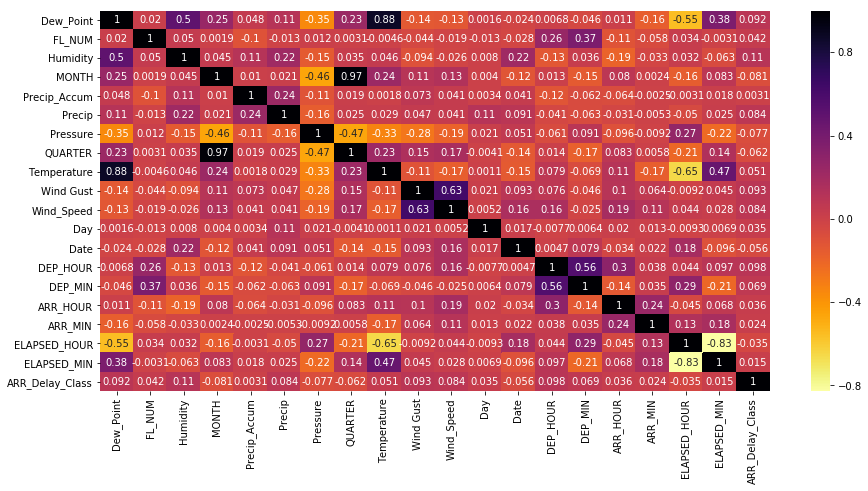

In [469]:
plt.figure(figsize=(15,7))
sns.heatmap(data = d.corr(), cmap = 'inferno_r',annot=True)

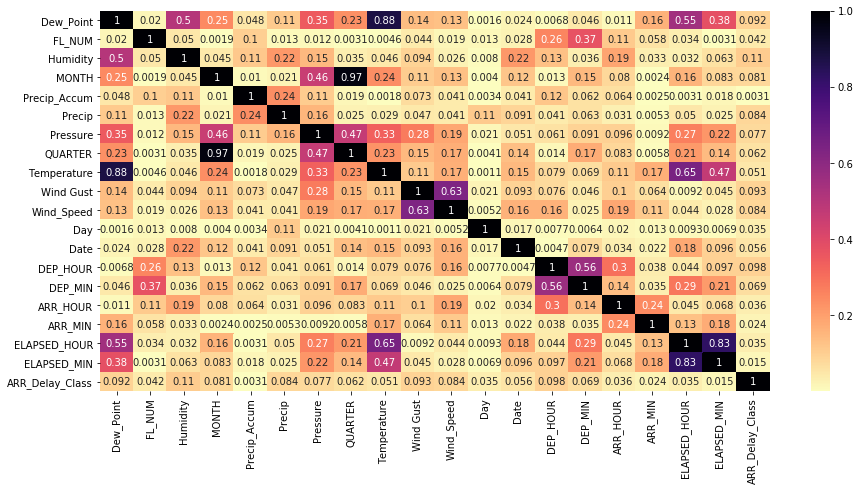

In [470]:
plt.figure(figsize=(15,7))
sns.heatmap(data = d.corr().abs(), cmap = 'magma_r',annot=True)

In [471]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, recall_score, classification_report
from sklearn.cross_validation import StratifiedKFold

In [472]:
from catboost import CatBoostClassifier

In [473]:
df = d.copy()

In [474]:
df.columns

Index(['Condition', 'Dew_Point', 'FL_NUM', 'Humidity', 'MONTH', 'Precip_Accum',
       'Precip', 'Pressure', 'QUARTER', 'Temperature', 'Wind', 'Wind Gust',
       'Wind_Speed', 'Day', 'Date', 'DEP_HOUR', 'DEP_MIN', 'ARR_HOUR',
       'ARR_MIN', 'ELAPSED_HOUR', 'ELAPSED_MIN', 'ARR_Delay_Class'],
      dtype='object')

In [475]:
df.FL_NUM = df.FL_NUM.astype('category')
df.Wind = df.Wind.astype('category')
df.Condition = df.Condition.astype('category')

In [476]:
for var in ['Condition', 'FL_NUM',  'MONTH','QUARTER','Day', 'Date',  'ARR_Delay_Class']:
    conv_to_cat(var,df)

In [477]:
#df.ARR_Delay_Class = df.ARR_Delay_Class.astype('int')

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1087
Data columns (total 22 columns):
Condition          1064 non-null category
Dew_Point          1064 non-null float64
FL_NUM             1064 non-null category
Humidity           1064 non-null float64
MONTH              1064 non-null category
Precip_Accum       1064 non-null float64
Precip             1064 non-null float64
Pressure           1064 non-null float64
QUARTER            1064 non-null category
Temperature        1064 non-null float64
Wind               1064 non-null category
Wind Gust          1064 non-null float64
Wind_Speed         1064 non-null float64
Day                1064 non-null category
Date               1064 non-null category
DEP_HOUR           1064 non-null float64
DEP_MIN            1064 non-null float64
ARR_HOUR           1064 non-null float64
ARR_MIN            1064 non-null float64
ELAPSED_HOUR       1064 non-null float64
ELAPSED_MIN        1064 non-null float64
ARR_Delay_Class    1064 n

In [479]:
Value_counts = {} 

for i in df.columns:
    Value_counts[i] = df[i].value_counts()
Value_counts

#print(value_counts)

{'Condition': Cloudy     613
 Fair       245
 Rain       111
 Windy       66
 Snow        15
 Fog         11
 Thunder      3
 Name: Condition, dtype: int64, 'Dew_Point':  23.0    30
  36.0    28
  25.0    27
  33.0    26
  71.0    24
  39.0    24
  52.0    23
  61.0    22
  65.0    22
  72.0    22
  26.0    21
  60.0    21
  47.0    21
  70.0    21
  40.0    21
  64.0    20
  41.0    20
  24.0    20
  51.0    20
  38.0    20
  67.0    19
  48.0    19
  68.0    19
  35.0    18
  31.0    18
  21.0    18
  63.0    18
  43.0    17
  49.0    17
  73.0    17
          ..
  57.0     8
  19.0     8
  8.0      8
  74.0     8
  16.0     7
  4.0      6
 -5.0      6
  9.0      5
  6.0      5
 -3.0      5
 -6.0      5
  13.0     5
  15.0     5
  7.0      5
 -4.0      4
 -7.0      4
  11.0     4
  3.0      4
  20.0     4
  5.0      3
 -10.0     2
  17.0     2
  1.0      2
  12.0     2
 -9.0      1
 -2.0      1
  14.0     1
 -8.0      1
  10.0     1
  0.0      1
 Name: Dew_Point, Length: 85, dtype: i

In [480]:
df.head()

,Condition,Dew_Point,FL_NUM,Humidity,MONTH,Precip_Accum,Precip,Pressure,QUARTER,Temperature,Wind,Wind Gust,Wind_Speed,Day,Date,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN,ELAPSED_HOUR,ELAPSED_MIN,ARR_Delay_Class
0,Windy,-5.0,33.0,58.0,1.0,0.0,0.0,30.4,1.0,7.0,N,0.0,21.0,0.0,1.0,7.0,0.0,10.0,55.0,4.0,15.0,0
1,Fair,-5.0,1.0,55.0,1.0,0.0,0.0,30.4,1.0,8.0,N,0.0,18.0,0.0,1.0,8.0,0.0,11.0,45.0,4.0,5.0,1
2,Windy,-3.0,163.0,49.0,1.0,0.0,0.0,30.4,1.0,13.0,N,0.0,24.0,0.0,1.0,11.0,0.0,14.0,33.0,3.0,93.0,1
3,Fair,-3.0,255.0,45.0,1.0,0.0,0.0,30.4,1.0,15.0,N,0.0,21.0,0.0,1.0,10.0,0.0,13.0,4.0,4.0,0.0,1
4,Windy,-4.0,3.0,39.0,1.0,0.0,0.0,30.3,1.0,17.0,N,0.0,24.0,0.0,1.0,12.0,0.0,15.0,28.0,3.0,88.0,1


In [564]:
X = df.iloc[:,:-1]

In [565]:
X.head()

,Condition,Dew_Point,FL_NUM,Humidity,MONTH,Precip_Accum,Precip,Pressure,QUARTER,Temperature,Wind,Wind Gust,Wind_Speed,Day,Date,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN,ELAPSED_HOUR,ELAPSED_MIN
0,Windy,-5.0,33.0,58.0,1.0,0.0,0.0,30.4,1.0,7.0,N,0.0,21.0,0.0,1.0,7.0,0.0,10.0,55.0,4.0,15.0
1,Fair,-5.0,1.0,55.0,1.0,0.0,0.0,30.4,1.0,8.0,N,0.0,18.0,0.0,1.0,8.0,0.0,11.0,45.0,4.0,5.0
2,Windy,-3.0,163.0,49.0,1.0,0.0,0.0,30.4,1.0,13.0,N,0.0,24.0,0.0,1.0,11.0,0.0,14.0,33.0,3.0,93.0
3,Fair,-3.0,255.0,45.0,1.0,0.0,0.0,30.4,1.0,15.0,N,0.0,21.0,0.0,1.0,10.0,0.0,13.0,4.0,4.0,0.0
4,Windy,-4.0,3.0,39.0,1.0,0.0,0.0,30.3,1.0,17.0,N,0.0,24.0,0.0,1.0,12.0,0.0,15.0,28.0,3.0,88.0


In [566]:
X.shape

(1064, 21)

In [567]:
y = df.iloc[:,21]

In [568]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: ARR_Delay_Class, dtype: category
Categories (2, int64): [0, 1]

In [569]:
y.shape

(1064,)

# converting categorical columns to numericals

In [332]:
X = pd.get_dummies(data= X, drop_first=True)

In [333]:
X.head()

,Dew_Point,Humidity,Precip_Accum,Precip,Pressure,Temperature,Wind Gust,Wind_Speed,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN,ELAPSED_HOUR,ELAPSED_MIN,Condition_Fair,Condition_Fog,Condition_Rain,Condition_Snow,Condition_Thunder,Condition_Windy,FL_NUM_3.0,FL_NUM_19.0,FL_NUM_21.0,FL_NUM_23.0,FL_NUM_33.0,FL_NUM_35.0,FL_NUM_83.0,FL_NUM_117.0,FL_NUM_133.0,FL_NUM_163.0,FL_NUM_171.0,FL_NUM_185.0,FL_NUM_255.0,FL_NUM_293.0,MONTH_2.0,MONTH_3.0,MONTH_4.0,MONTH_5.0,MONTH_6.0,MONTH_7.0,MONTH_8.0,MONTH_9.0,MONTH_10.0,MONTH_11.0,MONTH_12.0,QUARTER_2.0,QUARTER_3.0,QUARTER_4.0,Wind_E,Wind_N,Wind_S,Wind_V,Wind_W,Day_1.0,Day_2.0,Day_3.0,Day_4.0,Day_5.0,Day_6.0,Date_2.0,Date_3.0,Date_4.0,Date_5.0,Date_6.0,Date_7.0,Date_8.0,Date_9.0,Date_10.0,Date_11.0,Date_12.0,Date_13.0,Date_14.0,Date_15.0,Date_16.0,Date_17.0,Date_18.0,Date_19.0,Date_20.0,Date_21.0,Date_22.0,Date_23.0,Date_24.0,Date_25.0,Date_26.0,Date_27.0,Date_28.0,Date_29.0,Date_30.0,Date_31.0
0,-5.0,58.0,0.0,0.0,30.4,7.0,0.0,21.0,7.0,0.0,10.0,55.0,4.0,15.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-5.0,55.0,0.0,0.0,30.4,8.0,0.0,18.0,8.0,0.0,11.0,45.0,4.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-3.0,49.0,0.0,0.0,30.4,13.0,0.0,24.0,11.0,0.0,14.0,33.0,3.0,93.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-3.0,45.0,0.0,0.0,30.4,15.0,0.0,21.0,10.0,0.0,13.0,4.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-4.0,39.0,0.0,0.0,30.3,17.0,0.0,24.0,12.0,0.0,15.0,28.0,3.0,88.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# splitting data

In [570]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1234,stratify=y)

In [571]:
from sklearn.model_selection import StratifiedKFold as SKF
skf = SKF(n_splits=5, shuffle=True,random_state=101)

In [572]:
skf.get_n_splits(X, y)

5

In [573]:
skf

StratifiedKFold(n_splits=5, random_state=101, shuffle=True)

In [574]:
for train_index, test_index in skf.split(X, y):
# Loops over 5 iterations to have Train test stratified split
     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [575]:
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((852, 21), (212, 21), (852,), (212,))

In [576]:
y_train.value_counts(), y_test.value_counts()
#y_train.ARR_Delay_Class.value_counts(), y_test.ARR_Delay_Class.value_counts()

(0    630
 1    222
 Name: ARR_Delay_Class, dtype: int64, 0    157
 1     55
 Name: ARR_Delay_Class, dtype: int64)

# oversampling

In [577]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 222
Before OverSampling, counts of label '0': 630 



In [578]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101 , k_neighbors=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

ValueError: could not convert string to float: 'W'

In [579]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 630
After OverSampling, counts of label '0': 630


# feature scaling

In [580]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_res = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'W'

# CatBoost

In [496]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [497]:
model = CatBoostClassifier(iterations=500,
                             learning_rate=0.05,
                             depth=12,
                             eval_metric='Recall',
                             random_seed = 101,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

In [498]:
model.fit(X_train, y_train, cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 82.8ms	remaining: 41.3s
50:	learn: 0.1576577	test: 0.0181818	best: 0.0363636 (2)	total: 14.2s	remaining: 2m 4s
100:	learn: 0.2522523	test: 0.1090909	best: 0.1090909 (96)	total: 22s	remaining: 1m 26s
150:	learn: 0.3198198	test: 0.1636364	best: 0.1636364 (141)	total: 38.5s	remaining: 1m 29s
200:	learn: 0.4864865	test: 0.2727273	best: 0.2727273 (197)	total: 1m 26s	remaining: 2m 8s
250:	learn: 0.7252252	test: 0.2727273	best: 0.3272727 (239)	total: 2m 39s	remaining: 2m 38s
300:	learn: 0.8288288	test: 0.2545455	best: 0.3272727 (239)	total: 4m	remaining: 2m 38s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3272727273
bestIteration = 239

Shrink model to first 240 iterations.


In [2782]:
y_pred = model.predict(X_test)

In [2783]:
y_pred_proba = model.predict_proba(X_test)[::,1]

In [499]:
model.feature_names_

[b'Condition',
 b'Dew_Point',
 b'FL_NUM',
 b'Humidity',
 b'MONTH',
 b'Precip_Accum',
 b'Precip',
 b'Pressure',
 b'QUARTER',
 b'Temperature',
 b'Wind',
 b'Wind Gust',
 b'Wind_Speed',
 b'Day',
 b'Date',
 b'DEP_HOUR',
 b'DEP_MIN',
 b'ARR_HOUR',
 b'ARR_MIN',
 b'ELAPSED_HOUR',
 b'ELAPSED_MIN']

In [500]:
model.feature_importances_

array([ 6.86038668,  6.33582219, 10.66776472,  5.01574193,  9.25881952,
        0.32851798,  0.41986427,  6.17550135,  6.7642516 ,  6.49563774,
        5.44271474,  4.78026169,  4.29427372,  5.64653842, 10.10064151,
        4.63708424,  1.13024278,  2.82501986,  1.63298507,  0.13199921,
        1.05593078])

In [544]:
feature_score = pd.DataFrame(list(zip(X_train.columns, model.get_feature_importance(Pool(X_train, label=y_train, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

In [545]:
model.get_feature_importance(Pool(X_train, label=y_train, cat_features=categorical_features_indices))

[6.860386683233129,
 6.335822194497033,
 10.667764722541385,
 5.015741927121824,
 9.258819521737392,
 0.3285179753614819,
 0.41986427209860677,
 6.175501352066146,
 6.764251598893277,
 6.495637736435321,
 5.442714735613744,
 4.780261686644173,
 4.294273716312014,
 5.6465384166105785,
 10.10064151398363,
 4.637084243090163,
 1.1302427772379922,
 2.8250198618725504,
 1.6329850689073846,
 0.13199921412277532,
 1.0559307816194166]

In [546]:
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [547]:
feature_score

,Feature,Score
2,FL_NUM,10.667765
14,Date,10.100642
4,MONTH,9.258820
0,Condition,6.860387
8,QUARTER,6.764252
9,Temperature,6.495638
1,Dew_Point,6.335822
7,Pressure,6.175501
13,Day,5.646538
10,Wind,5.442715


In [540]:
filter_feature = feature_score.set_index(keys ='Feature')

In [541]:
filter_feature = feature_score.loc[['MONTH','Condition','QUARTER','Temperature', 'Dew_Point','Pressure','Day',
                                   'Wind', 'Humidity', 'Wind Gust', 'Wind_Speed', 'Precip', 'Precip_Accum'],:]

In [543]:
filter_feature.reset_index(inplace=True)

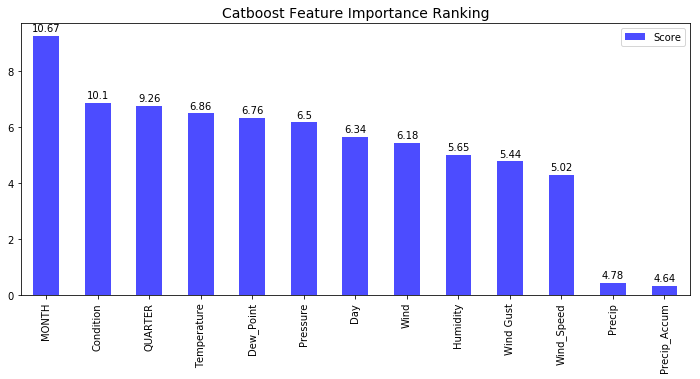

In [557]:
plt.rcParams["figure.figsize"] = (12,5)
ax = filter_feature.plot('Feature', 'Score', kind='bar', color='b', alpha=.7)
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

# get feature score as labels round to 2 decimal
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.1, label, ha='center', va='bottom')
plt.savefig('feature_importance_weather')
plt.show()
#plt.savefig('feature_importance')

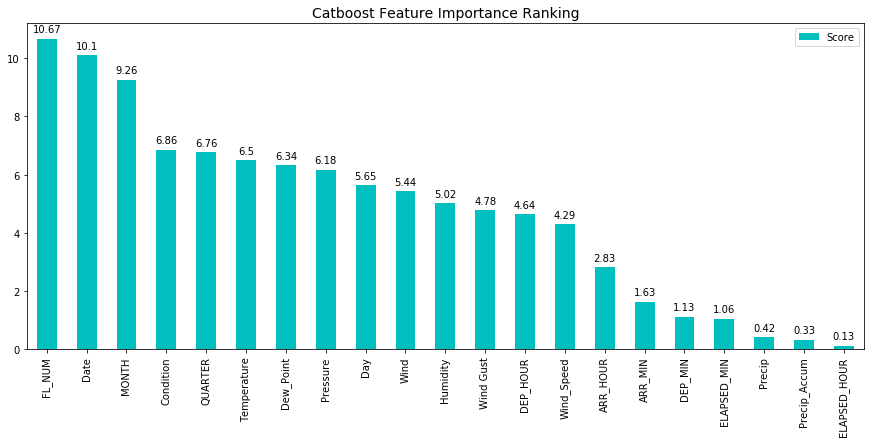

In [529]:
plt.rcParams["figure.figsize"] = (15,6)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

# get feature score as labels round to 2 decimal
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.15, label, ha='center', va='bottom')
plt.savefig('feature_importance')
plt.show()
#plt.savefig('feature_importance')

In [509]:
from catboost import Pool, CatBoostClassifier, cv

In [2784]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn, fp, fn, tp : ', tn, fp, fn, tp)
print(confusion_matrix(y_true = y_test, y_pred = y_pred, labels=(0,1)))
print(classification_report(y_true = y_test, y_pred = y_pred))
print(roc_auc_score(y_test, y_pred))

tn, fp, fn, tp :  149 8 40 15
[[149   8]
 [ 40  15]]
             precision    recall  f1-score   support

          0       0.79      0.95      0.86       157
          1       0.65      0.27      0.38        55

avg / total       0.75      0.77      0.74       212

0.6108859293572669


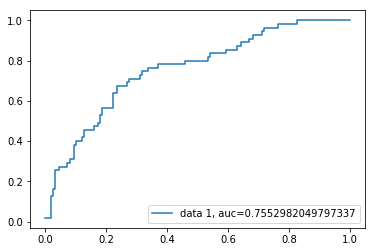

In [2786]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# LGB

In [ ]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50, # because training data is sightly unbalanced 
         }

# KNN

In [2595]:
from sklearn.neighbors import KNeighborsClassifier

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [2645]:
parameters = {'n_neighbors':[2,3,5,6,7,8,9,10,11,12,13],
              'leaf_size':[1,2,3,5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'n_jobs':[-1]}
                           #leaf_size=30, p=2, metric='minkowski', metric_params=None, 'leaf_size':[1,3,5],
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=3, verbose=7, n_jobs=3, scoring = 'recall')
clf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 352 candidates, totalling 1056 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   10.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   26.1s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:   37.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   51.3s
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 386 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 506 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done 962 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done 1056 out of 1056 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_neighbors': [2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'leaf_size': [1, 2, 3, 5], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=7)

In [2647]:
clf.best_params_ , clf.best_score_

({'algorithm': 'auto',
  'leaf_size': 1,
  'n_jobs': -1,
  'n_neighbors': 2,
  'weights': 'distance'},
 0.9412698412698413)

In [2648]:
knn = KNeighborsClassifier(n_neighbors=2, leaf_size=1,weights='distance', algorithm='auto')

In [2649]:
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')

In [2650]:
y_pred = knn.predict(X_test)

In [2651]:
print(knn.score(X_train_res,y_train_res))
print(knn.score(X_test,y_pred))

1.0
1.0


In [2652]:
y_pred_proba = knn.predict_proba(X_test)[::,1]

In [2653]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn, fp, fn, tp : ', tn, fp, fn, tp)
print(confusion_matrix(y_true = y_test, y_pred = y_pred, labels=(0,1)))
print(classification_report(y_true = y_test, y_pred = y_pred))
print(roc_auc_score(y_test, y_pred))

tn, fp, fn, tp :  116 41 29 26
[[116  41]
 [ 29  26]]
             precision    recall  f1-score   support

          0       0.80      0.74      0.77       157
          1       0.39      0.47      0.43        55

avg / total       0.69      0.67      0.68       212

0.605790387955993


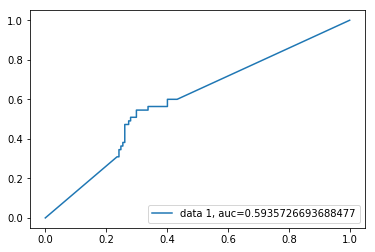

In [2654]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Grid Search

In [2910]:
#np.linspace(0.01, 2, 500)

In [207]:
parameters = {'C': np.linspace(0.01, 2, 500), 
              'max_iter' : [30,40,50,100,150,200], 
              'solver' : ['newton-cg', 'lbfgs' ,'sag']
              
             }#'penalty' : ['l1', 'l2'], 
lr = LogisticRegression(penalty='l2',random_state=101)
clf = GridSearchCV(lr, parameters, cv=5, verbose=7, n_jobs=3, scoring = 'recall')
clf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=3)]: Done  87 tasks      | elapsed:    6.8s
[Parallel(n_jobs=3)]: Done 199 tasks      | elapsed:   13.4s
[Parallel(n_jobs=3)]: Done 343 tasks      | elapsed:   18.5s
[Parallel(n_jobs=3)]: Done 519 tasks      | elapsed:   25.5s
[Parallel(n_jobs=3)]: Done 727 tasks      | elapsed:   35.8s
[Parallel(n_jobs=3)]: Done 967 tasks      | elapsed:   52.5s
[Parallel(n_jobs=3)]: Done 1239 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 1543 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done 1879 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 2247 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 2647 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done 3079 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done 3543 tasks      | elapsed:  3.7min
[Parallel(n_jobs=3)]: Done 4039 tasks      | elapsed:  4.3min
[Parallel(n_jobs

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': array([0.01   , 0.01399, ..., 1.99601, 2.     ]), 'max_iter': [30, 40, 50, 100, 150, 200], 'solver': ['newton-cg', 'lbfgs', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=7)

In [208]:
clf.best_params_ , clf.best_score_


({'C': 0.652064128256513, 'max_iter': 40, 'solver': 'lbfgs'},
 0.726984126984127)

In [585]:
lr1 = LogisticRegression(C=0.65,penalty='l2', verbose=5, random_state=101, solver = 'lbfgs', max_iter=40)
lr1.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s finished


LogisticRegression(C=0.65, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=40, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='lbfgs', tol=0.0001,
          verbose=5, warm_start=False)

In [586]:
X.columns

Index(['Condition', 'Dew_Point', 'FL_NUM', 'Humidity', 'MONTH', 'Precip_Accum',
       'Precip', 'Pressure', 'QUARTER', 'Temperature', 'Wind', 'Wind Gust',
       'Wind_Speed', 'Day', 'Date', 'DEP_HOUR', 'DEP_MIN', 'ARR_HOUR',
       'ARR_MIN', 'ELAPSED_HOUR', 'ELAPSED_MIN'],
      dtype='object')

In [588]:
l=[]
for c in lr1.coef_:
    l.append(c)
coeff =  (sorted(zip(map(lambda x: round(x, 4), c), X.columns),reverse=True))
#print(list(zip(X.columns, c)))   

In [595]:
coeff

[(0.4048, 'ARR_HOUR'),
 (0.3492, 'Precip'),
 (0.2603, 'Dew_Point'),
 (0.2456, 'Precip_Accum'),
 (0.2094, 'Wind'),
 (0.1871, 'Humidity'),
 (0.1316, 'Pressure'),
 (0.0982, 'Date'),
 (0.0638, 'Wind Gust'),
 (-0.031, 'DEP_MIN'),
 (-0.0899, 'DEP_HOUR'),
 (-0.1033, 'ELAPSED_HOUR'),
 (-0.1575, 'Temperature'),
 (-0.1814, 'FL_NUM'),
 (-0.2024, 'ARR_MIN'),
 (-0.2796, 'ELAPSED_MIN'),
 (-0.3201, 'QUARTER'),
 (-0.3225, 'MONTH'),
 (-0.3491, 'Day'),
 (-0.427, 'Wind_Speed'),
 (-0.9019, 'Condition')]

In [612]:
coeff_df = pd.DataFrame(coeff, columns=['Coefficient','Feature' ])

In [611]:
coeff_df.rename(columns={'0' : 'Coefficient'}, inplace=True)
coeff_df.rename(columns={'1' : 'Feature'}, inplace=True)

In [613]:
coeff_df.head()

,Coefficient,Feature
0,0.4048,ARR_HOUR
1,0.3492,Precip
2,0.2603,Dew_Point
3,0.2456,Precip_Accum
4,0.2094,Wind


In [622]:
filter_coeff_df = coeff_df.set_index('Feature')

In [623]:
filter_coeff_df = filter_coeff_df.loc[['Temperature', 'Dew_Point','Pressure',
                                   'Wind', 'Humidity', 'Wind Gust', 'Wind_Speed', 'Precip', 'Precip_Accum'],:]

In [624]:
filter_coeff_df.reset_index(inplace=True)

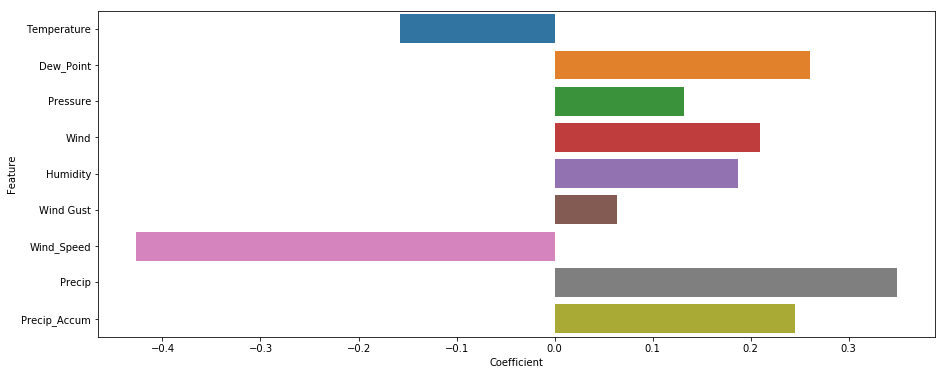

In [626]:
sns.barplot(x='Coefficient', y='Feature', data=filter_coeff_df)
plt.savefig('weather_coeff')

In [210]:
y_pred = lr1.predict(X_test)


In [211]:
y_pred_proba = lr1.predict_proba(X_test)[::,1]


In [212]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn, fp, fn, tp : ', tn, fp, fn, tp)
print(confusion_matrix(y_true = y_test, y_pred = y_pred, labels=(0,1)))
print(classification_report(y_true = y_test, y_pred = y_pred))
print(roc_auc_score(y_test, y_pred))

tn, fp, fn, tp :  114 43 19 36
[[114  43]
 [ 19  36]]
             precision    recall  f1-score   support

          0       0.86      0.73      0.79       157
          1       0.46      0.65      0.54        55

avg / total       0.75      0.71      0.72       212

0.6903300521134916


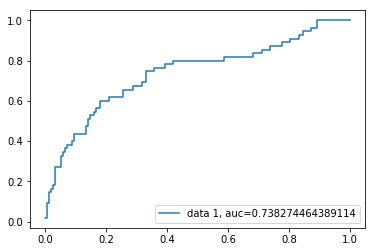

In [3078]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# random forest

In [2680]:
from sklearn.ensemble import RandomForestClassifier

In [2681]:
rf = RandomForestClassifier(oob_score=True, n_jobs=1, random_state=101, verbose=1)

In [2682]:
rf.fit(X_train_res,y_train_res)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=101, verbose=5, warm_start=False)

In [2683]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [2684]:
y_pred_proba = rf.predict_proba(X_test)[::,1]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [2685]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn, fp, fn, tp : ', tn, fp, fn, tp)
print(confusion_matrix(y_true = y_test, y_pred = y_pred, labels=(0,1)))
print(classification_report(y_true = y_test, y_pred = y_pred))
print(roc_auc_score(y_test, y_pred))

tn, fp, fn, tp :  140 17 37 18
[[140  17]
 [ 37  18]]
             precision    recall  f1-score   support

          0       0.79      0.89      0.84       157
          1       0.51      0.33      0.40        55

avg / total       0.72      0.75      0.72       212

0.6094962362478286


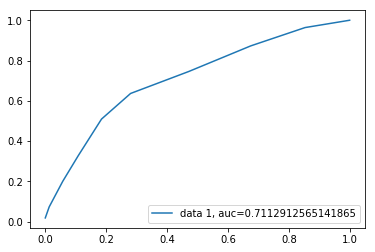

In [2686]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [2694]:
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X.columns),reverse=True))

[(0.0836, 'Temperature'), (0.0789, 'Dew_Point'), (0.0601, 'MONTH'), (0.0584, 'Pressure'), (0.0557, 'Humidity'), (0.0508, 'Wind_Speed'), (0.0487, 'ARR_MIN'), (0.0484, 'Date'), (0.0481, 'ELAPSED_MIN'), (0.0439, 'Day'), (0.0433, 'DEP_HOUR'), (0.04, 'ARR_HOUR'), (0.0247, 'FL_NUM_293.0'), (0.0228, 'Wind_S'), (0.0224, 'QUARTER'), (0.0205, 'Wind Gust'), (0.0165, 'Condition_Fair'), (0.0154, 'FL_NUM_3.0'), (0.0143, 'Wind_W'), (0.0133, 'DEP_MIN'), (0.0117, 'FL_NUM_255.0'), (0.0109, 'Wind_WSW'), (0.0103, 'Wind_NW'), (0.0098, 'FL_NUM_133.0'), (0.0097, 'Wind_ENE'), (0.0095, 'FL_NUM_163.0'), (0.009, 'Wind_WNW'), (0.009, 'FL_NUM_117.0'), (0.0088, 'Condition_Rain'), (0.0085, 'Wind_SW'), (0.0085, 'FL_NUM_23.0'), (0.0073, 'Condition_Windy'), (0.0071, 'FL_NUM_171.0'), (0.0064, 'Wind_SSE'), (0.0064, 'Precip'), (0.006, 'Wind_NNE'), (0.0059, 'FL_NUM_185.0'), (0.0051, 'FL_NUM_33.0'), (0.005, 'ELAPSED_HOUR'), (0.0036, 'Wind_N'), (0.0036, 'FL_NUM_35.0'), (0.0033, 'FL_NUM_19.0'), (0.0032, 'Wind_VAR'), (0.0032, 